# Install and Import

In [1]:
# Install required packages
!pip install kagglehub tensorflow --quiet


# Download the Dataset

In [2]:
import kagglehub

# Download the dataset
path = kagglehub.dataset_download("prashant268/chest-xray-covid19-pneumonia")
print("Dataset downloaded to:", path)


Dataset downloaded to: /kaggle/input/chest-xray-covid19-pneumonia


# Imports & Configuration

In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

# Ensure reproducibility
np.random.seed(42)
tf.random.set_seed(42)


# Paths & Parameters

In [5]:
# Update the base path
BASE_DIR = '/kaggle/input/chest-xray-covid19-pneumonia/Data'

train_dir = os.path.join(BASE_DIR, 'train')
test_dir = os.path.join(BASE_DIR, 'test')

IMG_SIZE = (224, 224)
BATCH_SIZE = 32


# Load Data Using ImageDataGenerator

In [6]:
train_datagen = ImageDataGenerator(rescale=1./255, horizontal_flip=True, zoom_range=0.2)
test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)



Found 5144 images belonging to 3 classes.
Found 1288 images belonging to 3 classes.


# CNN Model

In [7]:
model = models.Sequential([
    layers.Input(shape=(*IMG_SIZE, 3)),

    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(train_data.num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,347 (42.61 MB)

 Trainable params: 11,169,347 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

# Train the Model

In [8]:
history = model.fit(
    train_data,
    validation_data=test_data,
    epochs=10
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 823ms/step - accuracy: 0.7337 - loss: 0.7085

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


161/161 ━━━━━━━━━━━━━━━━━━━━ 165s 973ms/step - accuracy: 0.7342 - loss: 0.7072 - val_accuracy: 0.8967 - val_loss: 0.2791
Epoch 2/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 117s 727ms/step - accuracy: 0.8678 - loss: 0.3473 - val_accuracy: 0.9099 - val_loss: 0.2254
Epoch 3/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 149s 768ms/step - accuracy: 0.8848 - loss: 0.3093 - val_accuracy: 0.9231 - val_loss: 0.2007
Epoch 4/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 117s 726ms/step - accuracy: 0.9070 - loss: 0.2537 - val_accuracy: 0.9340 - val_loss: 0.1729
Epoch 5/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 124s 771ms/step - accuracy: 0.9157 - loss: 0.2430 - val_accuracy: 0.9231 - val_loss: 0.2020
Epoch 6/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 123s 766ms/step - accuracy: 0.9067 - loss: 0.2364 - val_accuracy: 0.9107 - val_loss: 0.2240
Epoch 7/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 115s 716ms/step - accuracy: 0.9247 - loss: 0.2052 - val_accuracy: 0.9224 - val_loss: 0.2129
Epoch 8/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 143s 721ms/step - accuracy: 0.9301 - loss: 0.19

# Plot Accuracy & Loss

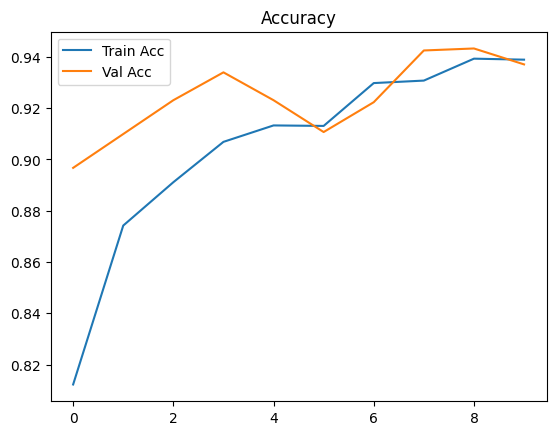

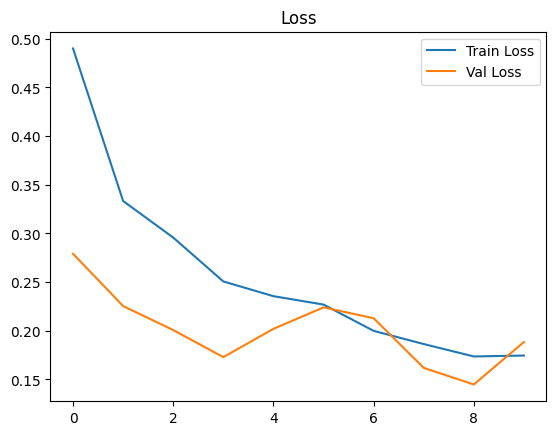

In [9]:
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.legend()
plt.show()


# Prediction on three Test Images

In [11]:
from tensorflow.keras.preprocessing import image

def predict_image(img_path):
    img = image.load_img(img_path, target_size=IMG_SIZE)
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    predictions = model.predict(img_array)
    class_index = np.argmax(predictions[0])
    class_label = list(train_data.class_indices.keys())[class_index]

    plt.imshow(img)
    plt.title(f"Predicted: {class_label}")
    plt.axis('off')
    plt.show()

# Example: predict_image('/kaggle/input/chest-xray-covid19-pneumonia/Data/test/covid/image1.jpg')


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 829ms/step


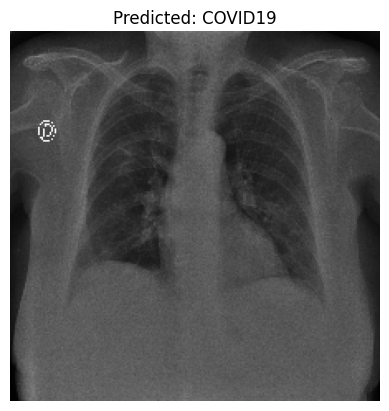

In [13]:
predict_image('/kaggle/input/chest-xray-covid19-pneumonia/Data/test/COVID19/COVID19(462).jpg')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


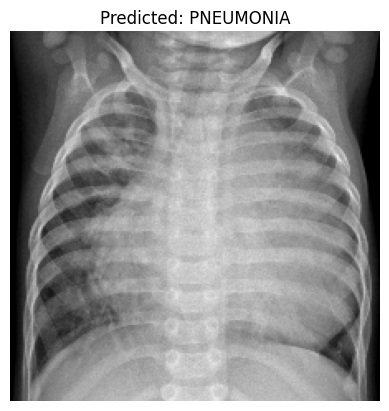

In [15]:
predict_image('/kaggle/input/chest-xray-covid19-pneumonia/Data/test/PNEUMONIA/PNEUMONIA(3419).jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


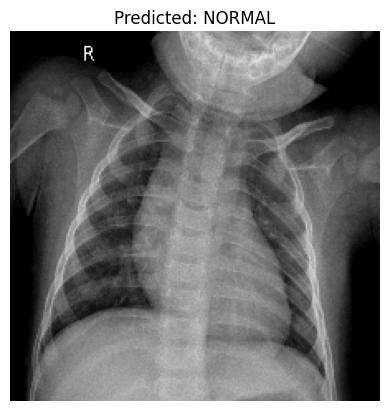

In [16]:
predict_image("/kaggle/input/chest-xray-covid19-pneumonia/Data/test/NORMAL/NORMAL(1269).jpg")